In [12]:
#Pamisetty Pujitha

In [13]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
iris = pd.read_csv('Iris.csv')

In [15]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
iris.drop("Id", axis=1, inplace = True)

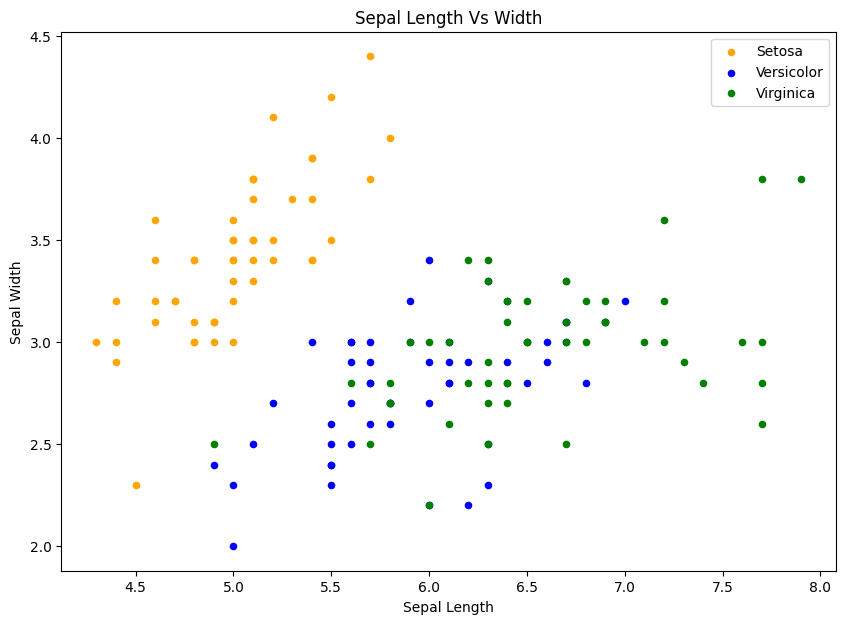

In [18]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

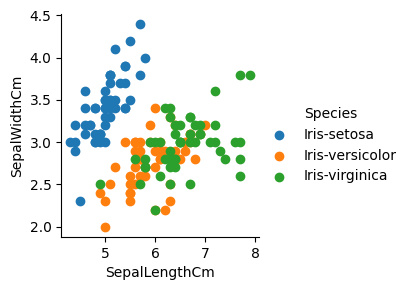

In [19]:
import seaborn as sns
sns.FacetGrid(iris, hue='Species')\
   .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm')\
   .add_legend()

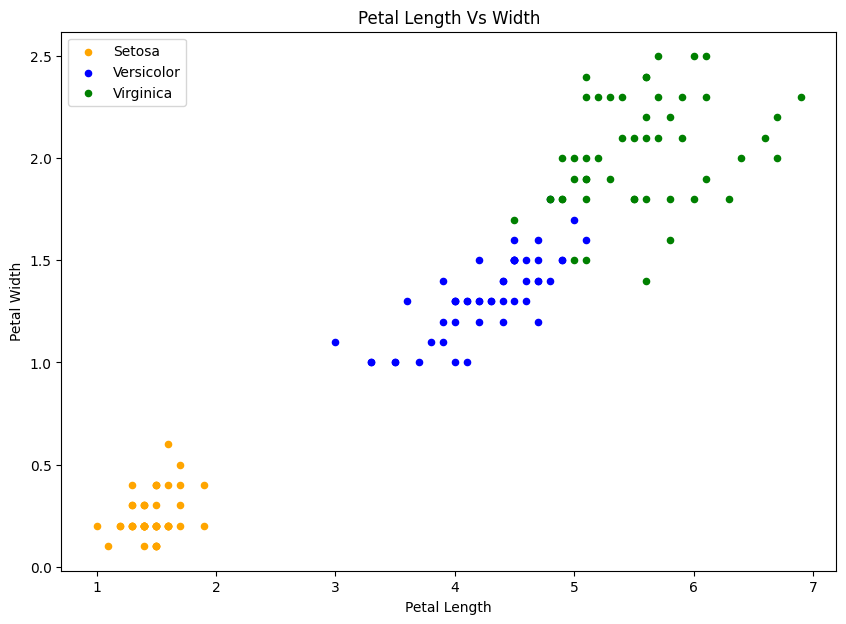

In [20]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

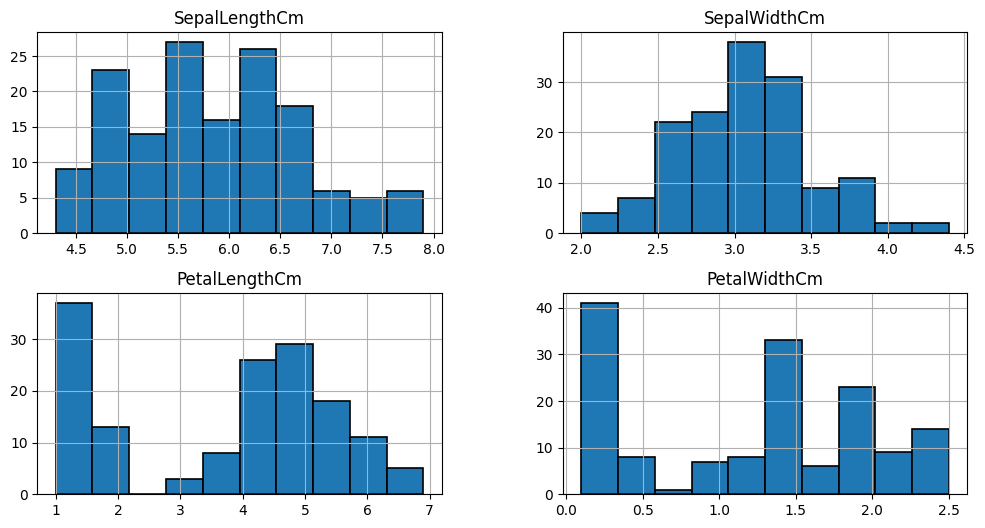

In [21]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

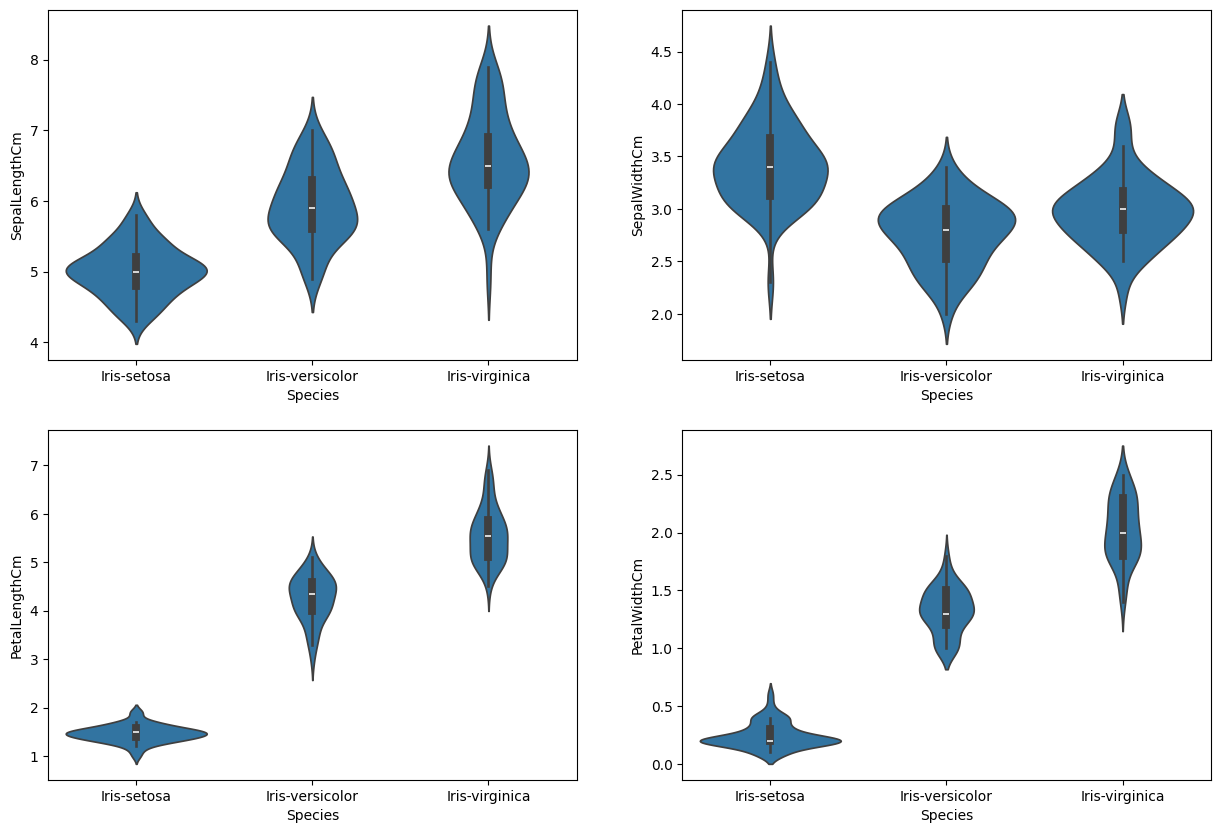

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=iris)

In [23]:
from sklearn.linear_model import LogisticRegression # for logistic regression algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for support vector machine algorithm
from sklearn import metrics # to check the accuracy of the model
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [24]:
train, test = train_test_split(iris, test_size=0.3)
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [25]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the test data features
test_y = test.Species # output of the test data

In [26]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
133,6.3,2.8,5.1,1.5
97,6.2,2.9,4.3,1.3
89,5.5,2.5,4.0,1.3
120,6.9,3.2,5.7,2.3
78,6.0,2.9,4.5,1.5


In [27]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
121,5.6,2.8,4.9,2.0
148,6.2,3.4,5.4,2.3
36,5.5,3.5,1.3,0.2
41,4.5,2.3,1.3,0.3
94,5.6,2.7,4.2,1.3


In [28]:
train_y.head()

133     Iris-virginica
97     Iris-versicolor
89     Iris-versicolor
120     Iris-virginica
78     Iris-versicolor
Name: Species, dtype: object

In [29]:
test_y.head()

121     Iris-virginica
148     Iris-virginica
36         Iris-setosa
41         Iris-setosa
94     Iris-versicolor
Name: Species, dtype: object

In [30]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is:  0.9111111111111111


In [31]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9555555555555556


In [32]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9777777777777777


In [33]:
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9777777777777777


In [34]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [35]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0)
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

In [36]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) 
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

In [37]:
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepals is: 0.8


In [38]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [39]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [40]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333
